### 아이리스 품종 예측 실행

#### 다중 분류에 적절한 오차 함수인 categorical_crossentropy를 사용하고, 최적화 함수로 adam을 사용
#### 전체 샘플이 50회 반복될 때까지 실험을 진행하되 한번에 입력되는 값은 1개로 함

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [5]:
# 데이터 입력
df = pd.read_csv("./iris.csv", names = ["sepal_length","sepal_width","petal_length","petal_width","species"])

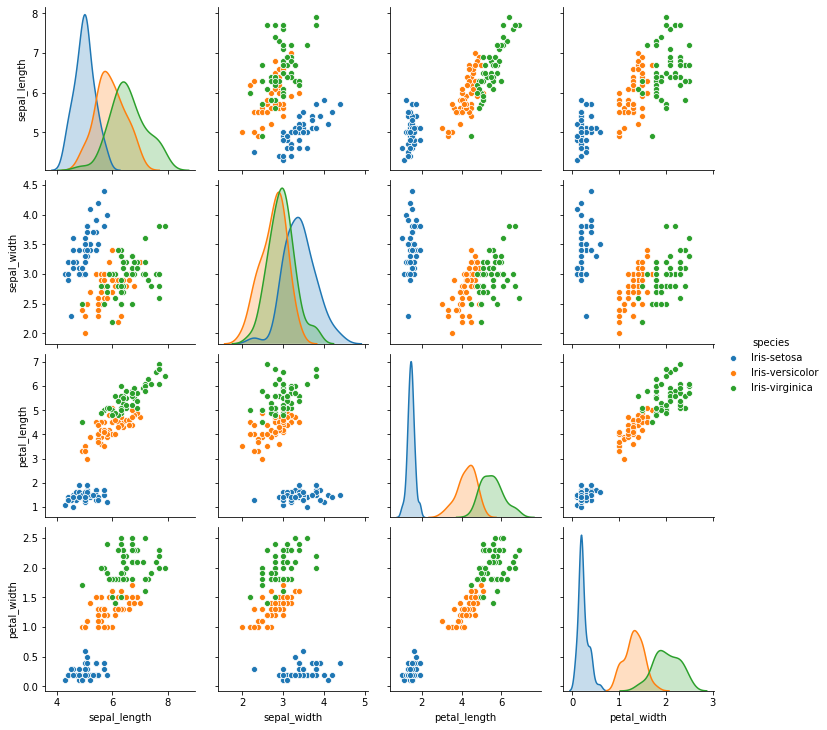

In [6]:
# 그래프로 확인
sns.pairplot(df, hue="species")
plt.show()

In [7]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

In [9]:
# 문자열을 숫자로 반환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

In [10]:
# 모델의 설정
model = Sequential()
model.add(Dense(16,input_dim=4,activation="relu"))
model.add(Dense(3,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# 모델 컴파일
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [12]:
# 모델 실행
model.fit(X,Y_encoded, epochs=50, batch_size=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
150/150 [==============================] - 0s 1ms/step - loss: 1.6259 - accuracy: 0.3267
Epoch 2/50
150/150 [==============================] - 0s 820us/step - loss: 1.1405 - accuracy: 0.4867
Epoch 3/50
150/150 [==============================] - 0s 843us/step - loss: 0.9412 - accuracy: 0.4600
Epoch 4/50
150/150 [==============================] - 0s 883us/step - loss: 0.7898 - accuracy: 0.7467
Epoch 5/50
150/150 [==============================] - 0s 889us/step - loss: 0.6669 - accuracy: 0.7267
Epoch 6/50
150/150 [==============================] - 0s 916us/step - loss: 0.5636 - accuracy: 0.8800
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.8267
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8867
Epoch 10/50
150/150 [=====================

In [13]:
# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X,Y_encoded)[1]))

150/150 [==============================] - 0s 162us/step

 Accuracy: 0.9733


### 예측 정확도는 97.33 % 